In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/diamonds.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
print("Categories in 'cut' variable:     ",end=" " )
print(df['cut'].unique())

print("Categories in 'color' variable:  ",end=" ")
print(df['color'].unique())

print("Categories in'clarity' variable:",end=" " )
print(df['clarity'].unique())



Categories in 'cut' variable:      ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Categories in 'color' variable:   ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Categories in'clarity' variable: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [8]:
df['length_in_mm'] = df['x']
df['width_in_mm'] = df['y']
df['depth_in_mm'] = df['z']

In [9]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,length_in_mm,width_in_mm,depth_in_mm
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.34,4.35,2.75


In [10]:
df = df.drop(['Unnamed: 0','x','y','z'],axis = 1)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,length_in_mm,width_in_mm,depth_in_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['cut']= label_encoder.fit_transform(df['cut'])
df['cut'].unique()

array([2, 3, 1, 4, 0])

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['color']= label_encoder.fit_transform(df['color'])
df['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['clarity']= label_encoder.fit_transform(df['clarity'])
df['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,length_in_mm,width_in_mm,depth_in_mm
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [17]:
X = df.drop('price', axis=1)
y = df['price']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((43152, 9), (10788, 9))

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1352.8001
- Mean Absolute Error: 863.0738
- R2 Score: 0.8850
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1351.2635
- Mean Absolute Error: 858.7085
- R2 Score: 0.8851


Lasso
Model performance for Training set
- Root Mean Squared Error: 1352.8953
- Mean Absolute Error: 864.8561
- R2 Score: 0.8850
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1351.3904
- Mean Absolute Error: 860.5242
- R2 Score: 0.8851


Ridge
Model performance for Training set
- Root Mean Squared Error: 1352.8027
- Mean Absolute Error: 863.4257
- R2 Score: 0.8850
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1351.2534
- Mean Absolute Error: 859.0539
- R2 Score: 0.8851


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 744.3489
- Mean Absolute Error: 390.1721
- R2 Sco

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.982964
5,Random Forest Regressor,0.981548
6,XGBRegressor,0.981276
4,Decision Tree,0.966527
3,K-Neighbors Regressor,0.949981
2,Ridge,0.885141
0,Linear Regression,0.885140
1,Lasso,0.885118
8,AdaBoost Regressor,0.881410


In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.51


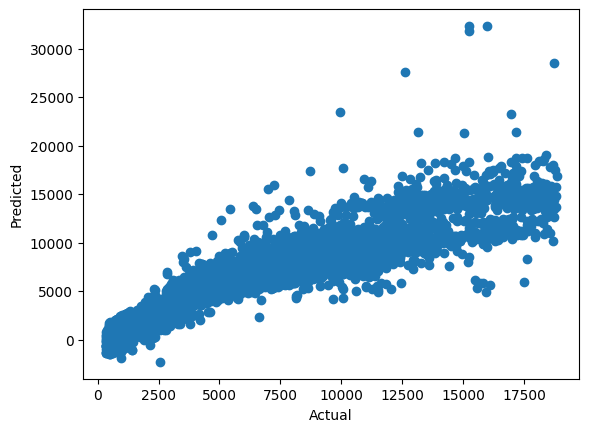

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

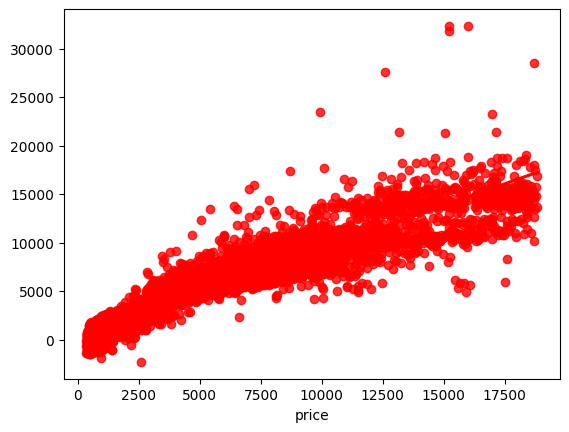

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [26]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1388,559,363.646688,195.353312
50052,2201,3355.932308,-1154.932308
41645,1238,2139.566064,-901.566064
42377,1304,2371.644610,-1067.644610
17244,6901,10551.699188,-3650.699188
...,...,...,...
44081,1554,1884.977785,-330.977785
23713,633,1064.398487,-431.398487
31375,761,619.037553,141.962447
21772,9836,7788.029534,2047.970466
